In [1]:
import pandas as pd
import numpy as np
archivo = 'csv_creados/Arg_MonetaryAgregates.csv'
df = pd.read_csv(archivo)

#### GDP

GDP : Gross Domestic Product

#### Añadimos a nuestro Data Frame el GDP en términos nominales

In [2]:
archivo = 'Data_in/GDP_Nominal_Argentina.xls'
gdp = pd.read_excel(archivo)

In [3]:
gdp['Año'] = pd.to_datetime(gdp['Año'].astype(str), format='%Y-%m-%d')
df['Año'] = pd.to_datetime(df['Año'])
df = pd.merge(df,gdp, on='Año', suffixes=('_df', '_gdp'))
df.head()

,Año,divisa,M0,M1,M2,M3,GDP (current LCU)
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.131509
1,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.166807
2,1962-12-31,Pesos,0.015288,0.024283,0.030303,0.033137,0.213136
3,1963-12-31,Pesos,0.021007,0.030905,0.039715,0.043840,0.253471
4,1964-12-31,Pesos,0.029565,0.044402,0.057836,0.063475,0.359472


### CPI

CPI : Consumer price index

#### Añadimos a nuestro Data Frame el CPI en número indice con año base 2016

In [4]:
archivo = 'Data_in/cpi_argentina2.xlsx'
cpi = pd.read_excel(archivo)
df = pd.merge(df,cpi, on='Año', suffixes=('_df_inflation', '_cpi'))


In [5]:
df.head()

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (Base Year 2016)
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.131509,6.172503e-12
1,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.166807,7.426182e-12
2,1962-12-31,Pesos,0.015288,0.024283,0.030303,0.033137,0.213136,9.570257e-12
3,1963-12-31,Pesos,0.021007,0.030905,0.039715,0.043840,0.253471,1.201940e-11
4,1964-12-31,Pesos,0.029565,0.044402,0.057836,0.063475,0.359472,1.547793e-11


Añadimos a nuestro Data Frame el GDP en términos reales

In [6]:
df_excel = pd.read_excel('Data_in/GDP_Real_Argentina.xls')
df_excel['Año'] = pd.to_datetime(df_excel['Año'])
df = df.merge(df_excel, on='Año', how='left')

In [7]:
df.head(1)

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (Base Year 2016),GDP (constant LCU)
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.02783,0.131509,6.172503e-12,182932009390


In [8]:
df.to_csv('csv_creados/df_infl.csv', index=False)

#### Calculamos la Velocidad del Dinero para los diferentes agregados monetarios

Ecuation of Exchange --> M * V = P * Q (PQ = nominal GDP)

V = GDP / M

In [11]:
m_aggregates = ['M0', 'M1', 'M2', 'M3']

for m in m_aggregates:
    column_name = f'Velocity of {m}'
    df[column_name] = df['GDP (current LCU)'] / df[m]

In [13]:
df.head(2)

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (Base Year 2016),GDP (constant LCU),Velocity of M0,Velocity of M1,Velocity of M2,Velocity of M3
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.131509,6.172503e-12,182932009390,9.154331,6.058445,5.032156,4.725354
1,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.166807,7.426182e-12,192861271430,11.793678,6.926671,5.692713,5.253627


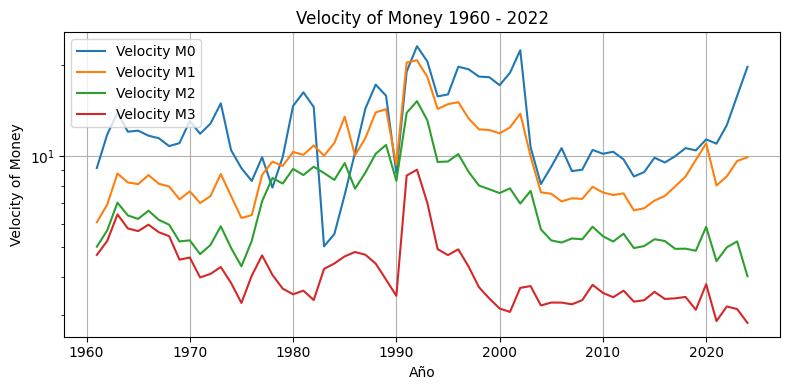

In [26]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 4))
plt.title('Velocity of Money 1960 - 2022')
plt.xlabel('Año')
plt.ylabel('Velocity of Money')

plt.plot(df['Año'], df['Velocity of M0'], label='Velocity M0')
plt.plot(df['Año'], df['Velocity of M1'], label='Velocity M1')
plt.plot(df['Año'], df['Velocity of M2'], label='Velocity M2')
plt.plot(df['Año'], df['Velocity of M3'], label='Velocity M3')


plt.yscale("log")  # Agrega la escala logarítmica al eje Y

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
df.to_csv('csv_creados/df_infl.csv', index=False) #df_infl --> datos en términos absolutos

#### Cremos otro Data Frame con las variables en tasas de variación anual

m + v = p + q
 
siendo:

m = crecimiento de la oferta monetaria

v = crecimiento de la velocidad del dinero

p = inflación

q = crecimiento del GDP real

In [16]:
archivo = 'csv_creados/df_infl.csv'
df_infl = pd.read_csv(archivo)

In [17]:
df_infl_tva = df_infl.copy()
for col in df_infl.columns[2:]:  # Excluye las columnas 'Año' y 'divisa'
    df_infl_tva[col] = df_infl[col].pct_change()

In [18]:
## Eliminamos la primera fila por no poder calcular su TVA
df_infl_tva = df_infl_tva.iloc[1:]
df_infl_tva.reset_index(drop=True, inplace=True)

In [19]:
df_infl_tva.columns = ['Año', 'Divisa', 'M0_gr', 'M1_gr', 'M2_gr', 'M3_gr', 'GDP_gr', 'Inflation Rate', 'GDP_Real_gr', 'Velocity M0_gr', 'Velocity M1_gr', 'Velocity M2_gr', 'Velocity M3_gr']

In [20]:
df_infl_tva.head()

,Año,Divisa,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M0_gr,Velocity M1_gr,Velocity M2_gr,Velocity M3_gr
0,1961-12-31,Pesos,-0.015452,0.109421,0.121229,0.140866,0.268410,0.203107,0.054278,0.288317,0.143308,0.131267,0.111796
1,1962-12-31,Pesos,0.080916,0.008348,0.034162,0.043666,0.277738,0.288718,-0.008520,0.182088,0.267160,0.235530,0.224279
2,1963-12-31,Pesos,0.374048,0.272704,0.310597,0.322993,0.189245,0.255912,-0.053082,-0.134495,-0.065576,-0.092593,-0.101095
3,1964-12-31,Pesos,0.407422,0.436742,0.456275,0.447860,0.418199,0.287746,0.101303,0.007657,-0.012906,-0.026147,-0.020486
4,1965-12-31,Pesos,0.392356,0.250926,0.259297,0.275853,0.340466,0.212329,0.105694,-0.037268,0.071579,0.064456,0.050643


In [21]:
df_infl_tva.to_csv('csv_creados/df_infl_tva.csv',index=False) #df_infl --> datos en términos relativos